In [1]:
I Dataset Comprehension

SyntaxError: invalid syntax (4114769365.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

data = pd.read_csv('dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [3]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


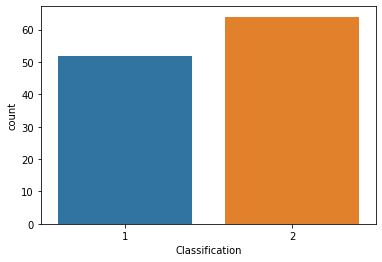

In [4]:
ax = sns.countplot(x = "Classification", data=data, linewidth = 4)

In [5]:
data.loc[data['Classification'] == 1].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692,1.0
std,18.957999,5.427465,10.191529,4.859793,1.218256,19.334699,7.631281,11.447053,292.242157,0.0
min,24.000000,18.670000,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000,1.0
25%,41.750000,23.096003,82.750000,4.304000,0.879510,11.845750,5.454286,6.597523,260.736500,1.0
50%,65.000000,27.694389,87.000000,5.483500,1.139683,21.494850,8.127775,8.929190,471.322500,1.0
75%,75.000000,32.328091,93.250000,7.001000,1.774561,36.721600,10.820219,12.808525,642.933500,1.0
max,89.000000,38.578759,118.000000,26.211000,7.111918,83.482100,38.040000,82.100000,1256.083000,1.0


In [6]:
data.loc[data['Classification'] == 2].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,56.671875,26.984740,105.56250,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500,2.0
std,13.493155,4.620398,26.55744,12.317738,4.588943,19.212451,6.189466,12.636979,384.001622,0.0
min,34.000000,18.370000,70.00000,2.432000,0.507936,6.333900,1.656020,3.210000,90.090000,2.0
25%,45.000000,22.788722,92.00000,4.406000,1.036842,12.402925,5.484117,8.113675,299.188250,2.0
50%,53.000000,27.408027,98.50000,7.580000,2.052256,18.877650,8.446438,14.371825,465.374000,2.0
75%,68.000000,30.810069,109.00000,16.063000,4.461312,37.378300,12.254740,22.965170,737.762500,2.0
max,86.000000,37.109375,201.00000,58.460000,25.050342,90.280000,33.750000,55.215300,1698.440000,2.0


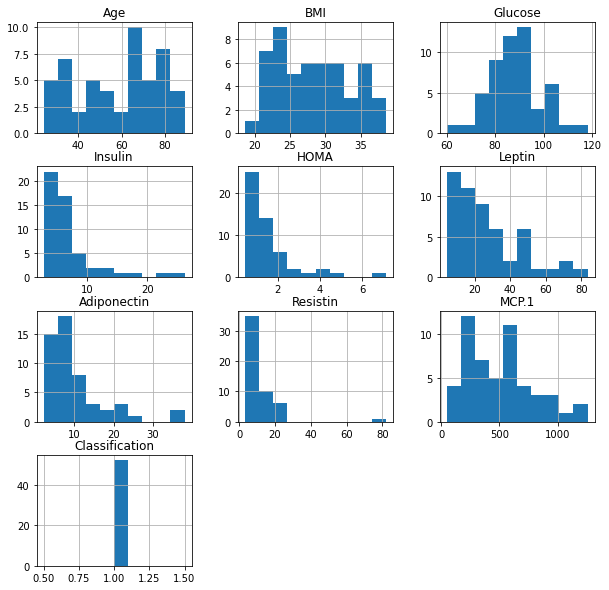

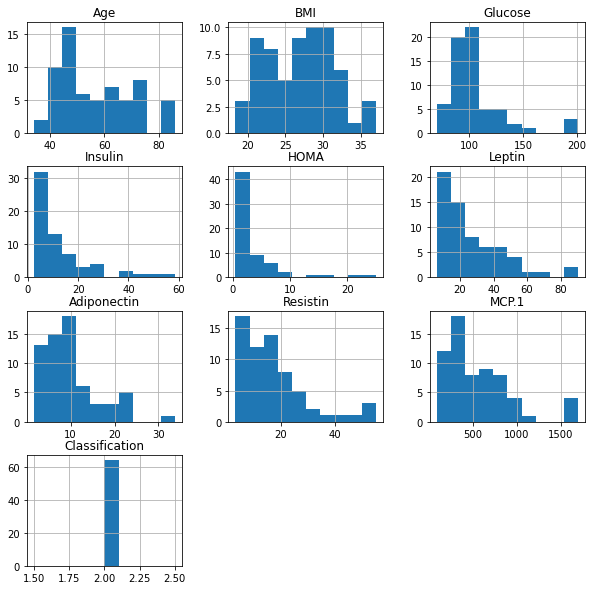

In [7]:
data.groupby('Classification').hist(figsize=(10, 10))
plt.show()

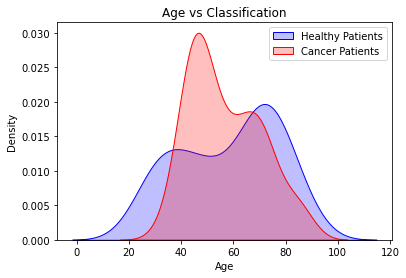

In [8]:
sns.kdeplot(data["Age"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Age"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Age vs Classification')
plt.show()

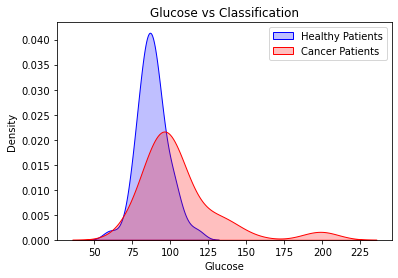

In [9]:
sns.kdeplot(data["Glucose"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Glucose"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Glucose vs Classification')
plt.show()

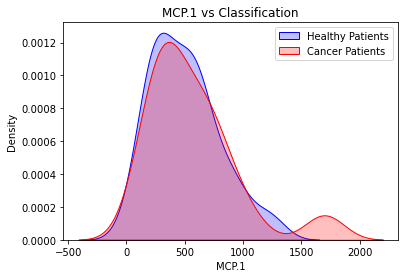

In [10]:
sns.kdeplot(data["MCP.1"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["MCP.1"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('MCP.1 vs Classification')
plt.show()

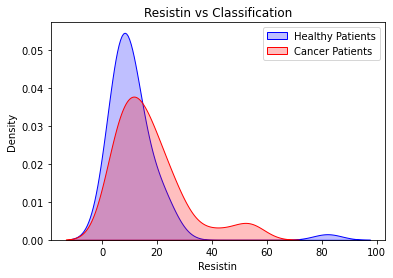

In [11]:
sns.kdeplot(data["Resistin"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Resistin"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Resistin vs Classification')
plt.show()

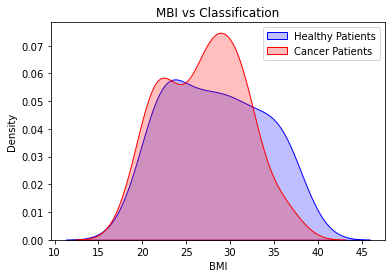

In [12]:
sns.kdeplot(data["BMI"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["BMI"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('MBI vs Classification')
plt.show()

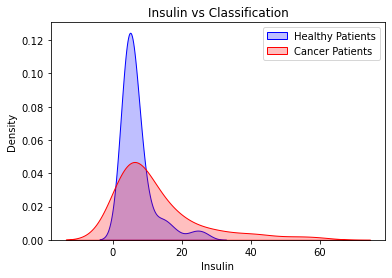

In [13]:
sns.kdeplot(data["Insulin"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Insulin"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Insulin vs Classification')
plt.show()

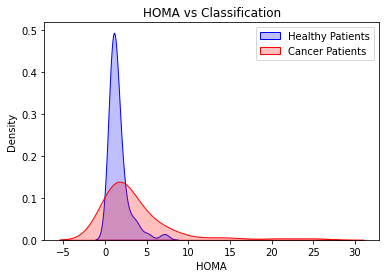

In [14]:
sns.kdeplot(data["HOMA"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["HOMA"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('HOMA vs Classification')
plt.show()

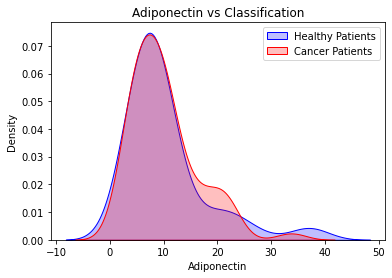

In [15]:
sns.kdeplot(data["Adiponectin"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Adiponectin"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Adiponectin vs Classification')
plt.show()

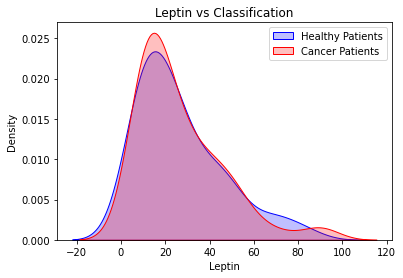

In [16]:
sns.kdeplot(data["Leptin"][data.Classification == 1],color="b",shade=True)
sns.kdeplot(data["Leptin"][data.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Patients', 'Cancer Patients'])
plt.title('Leptin vs Classification')
plt.show()

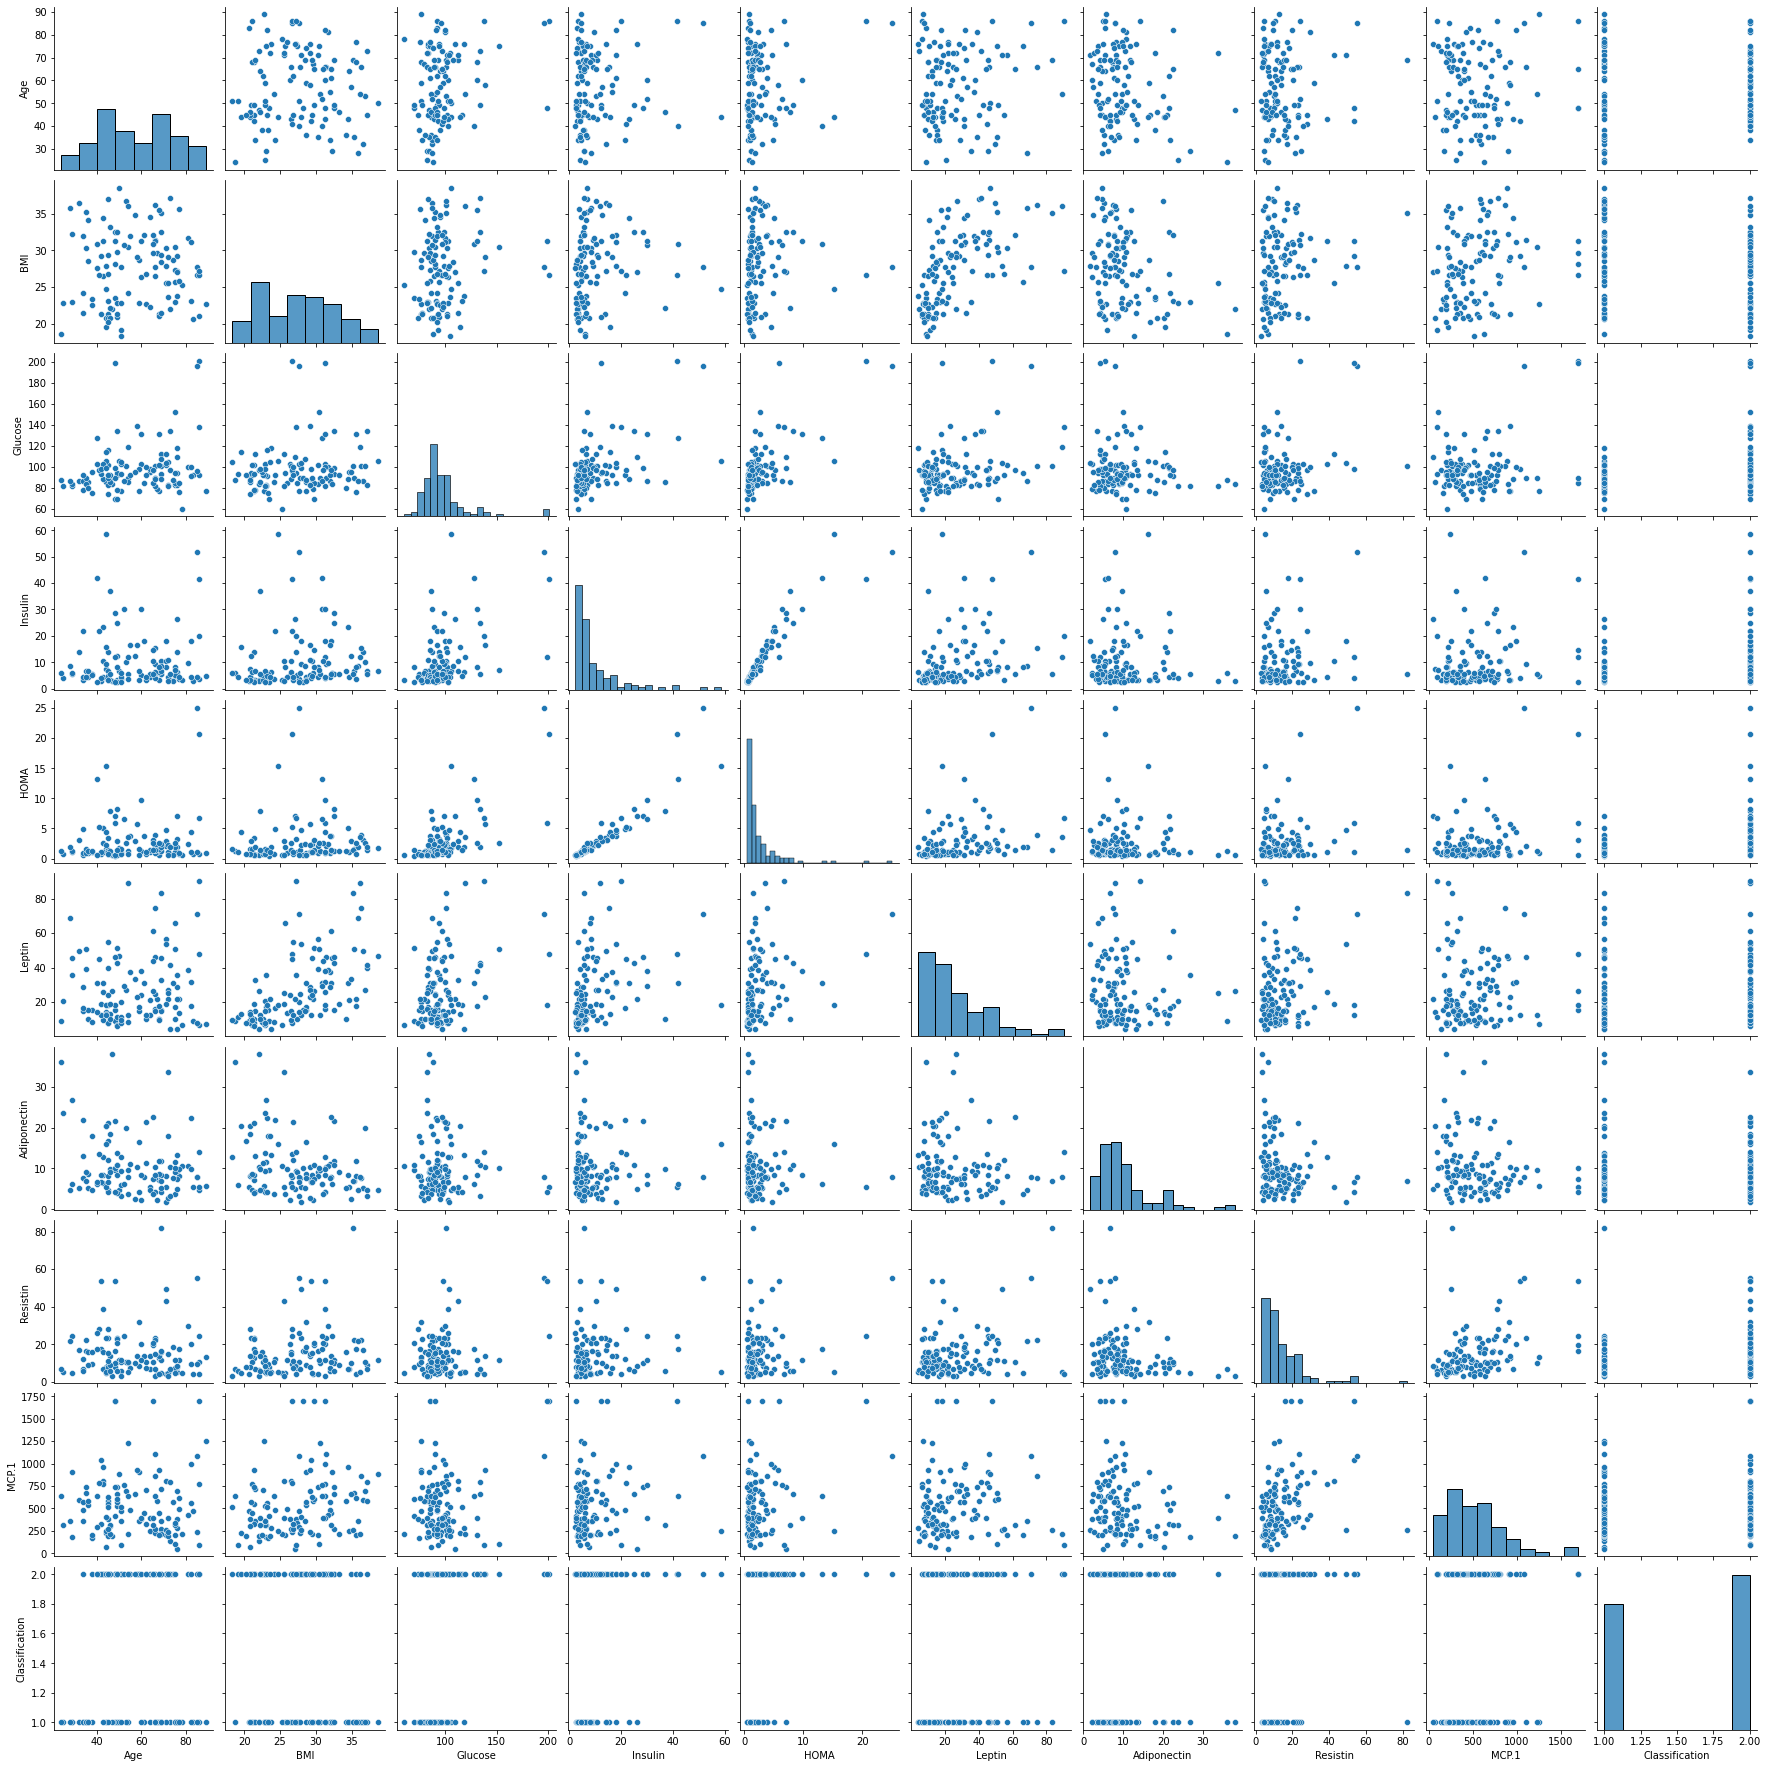

In [17]:
sns.pairplot(data)
plt.show()

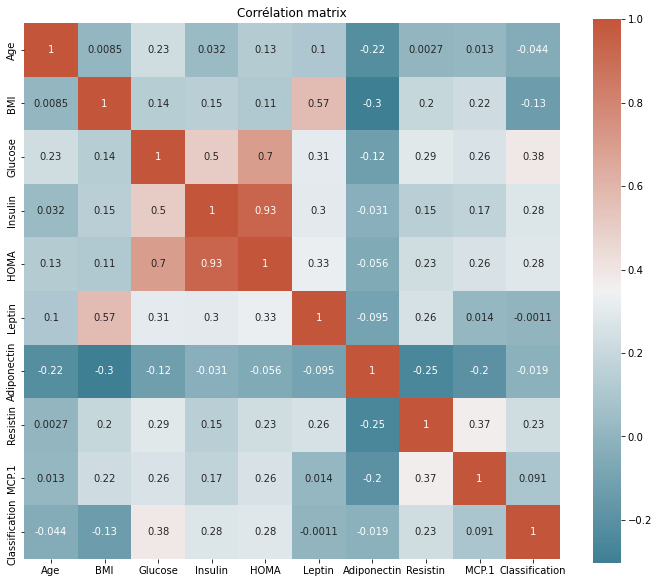

In [18]:
corr = data.corr()
_,ax=plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,20,as_cmap=True)
corr_map=sns.heatmap(corr, cmap = cmap,square=True, ax=ax, annot = True).set(title='Corrélation matrix')

In [19]:
print(corr["Classification"],"\n")

Age              -0.043555
BMI              -0.132586
Glucose           0.384315
Insulin           0.276804
HOMA              0.284012
Leptin           -0.001078
Adiponectin      -0.019490
Resistin          0.227310
MCP.1             0.091381
Classification    1.000000
Name: Classification, dtype: float64 



In [35]:
X = data.drop(['Classification'], axis = 1)
Y = data['Classification']
X_fit = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_fit, Y, test_size=.25, random_state=0)

In [20]:
II Prediction

SyntaxError: invalid syntax (270651479.py, line 1)

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       0.81      0.76      0.79        17

    accuracy                           0.76        29
   macro avg       0.75      0.76      0.75        29
weighted avg       0.76      0.76      0.76        29

0.76 accuracy with a standard deviation of 0.12


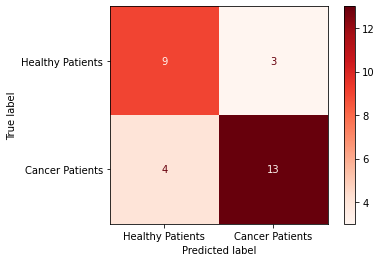

In [36]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,Y_train)
Y_knnPred=knn_model.predict(X_test)
print(classification_report(Y_test, Y_knnPred))
plot_confusion_matrix(knn_model,X_test,Y_test,normalize = None,display_labels = ['Healthy Patients', 'Cancer Patients'],cmap ='Reds')
scores = cross_val_score(knn_model, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
KNN

In [21]:
Logistic Regression

SyntaxError: invalid syntax (4094908863.py, line 1)

              precision    recall  f1-score   support

           1       0.50      0.42      0.45        12
           2       0.63      0.71      0.67        17

    accuracy                           0.59        29
   macro avg       0.57      0.56      0.56        29
weighted avg       0.58      0.59      0.58        29

0.74 accuracy with a standard deviation of 0.11


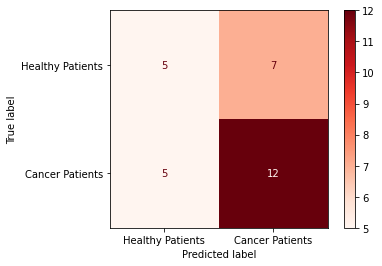

In [37]:
Log = LogisticRegression(random_state = 0)
Log.fit(X_train, Y_train)
Y_LogPred=Log.predict(X_test)
print(classification_report(Y_test, Y_LogPred))
plot_confusion_matrix(Log,X_test,Y_test,normalize = None,display_labels = ['Healthy Patients', 'Cancer Patients'],cmap ='Reds')
scores = cross_val_score(Log, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [23]:
Decision Tree

SyntaxError: invalid syntax (4134937090.py, line 1)

              precision    recall  f1-score   support

           1       0.57      0.67      0.62        12
           2       0.73      0.65      0.69        17

    accuracy                           0.66        29
   macro avg       0.65      0.66      0.65        29
weighted avg       0.67      0.66      0.66        29

0.62 accuracy with a standard deviation of 0.13


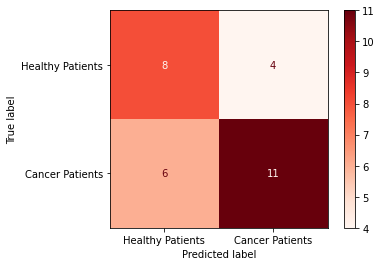

In [38]:
tree=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)
Y_treepred=tree.predict(X_test)
print(classification_report(Y_test, Y_treepred))
plot_confusion_matrix(tree,X_test,Y_test,normalize = None,display_labels = ['Healthy Patients', 'Cancer Patients'],cmap ='Reds')
scores = cross_val_score(tree, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [25]:
LDA

NameError: name 'LDA' is not defined

              precision    recall  f1-score   support

           1       0.54      0.58      0.56        12
           2       0.69      0.65      0.67        17

    accuracy                           0.62        29
   macro avg       0.61      0.62      0.61        29
weighted avg       0.63      0.62      0.62        29

0.72 accuracy with a standard deviation of 0.12


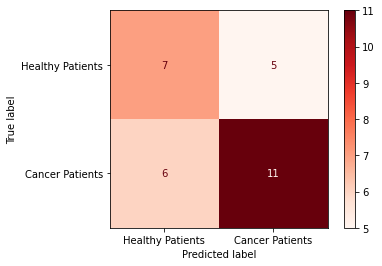

In [39]:
LDA = LinearDiscriminantAnalysis(solver='svd')
LDA.fit(X_train, Y_train)
Y_ldapred=LDA.predict(X_test)
print(classification_report(Y_test, Y_ldapred))
plot_confusion_matrix(LDA,X_test,Y_test,normalize = None,display_labels = ['Healthy Patients', 'Cancer Patients'],cmap ='Reds')
scores = cross_val_score(LDA, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [27]:
SVM

NameError: name 'SVM' is not defined

              precision    recall  f1-score   support

           1       0.45      0.42      0.43        12
           2       0.61      0.65      0.63        17

    accuracy                           0.55        29
   macro avg       0.53      0.53      0.53        29
weighted avg       0.55      0.55      0.55        29

0.71 accuracy with a standard deviation of 0.11


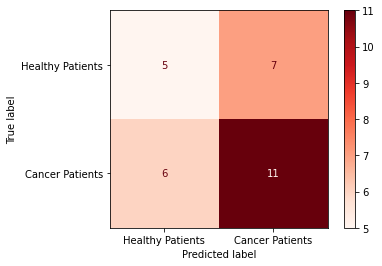

In [40]:
svc = SVC(kernel = 'linear', random_state =0)
svc.fit(X_train, Y_train)
Y_svcpred=svc.predict(X_test)
print(classification_report(Y_test, Y_svcpred))
plot_confusion_matrix(svc,X_test,Y_test,normalize = None,display_labels = ['Healthy Patients', 'Cancer Patients'],cmap ='Reds')
scores = cross_val_score(svc, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [29]:
ROC Curve

SyntaxError: invalid syntax (1477951670.py, line 1)

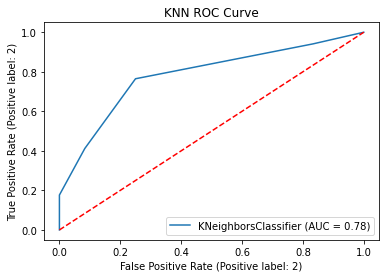

In [41]:
plot_roc_curve(knn_model, X_test, Y_test)
plt.title('KNN ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

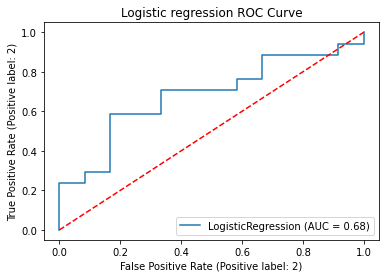

In [42]:
plot_roc_curve(Log, X_test, Y_test)
plt.title('Logistic regression ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

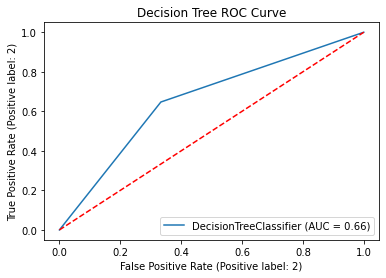

In [43]:
plot_roc_curve(tree, X_test, Y_test)
plt.title('Decision Tree ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

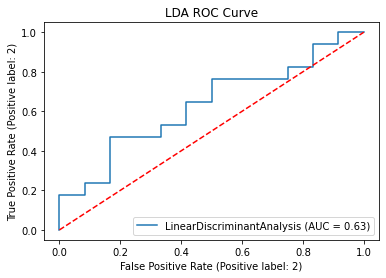

In [44]:
plot_roc_curve(LDA, X_test, Y_test)
plt.title('LDA ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

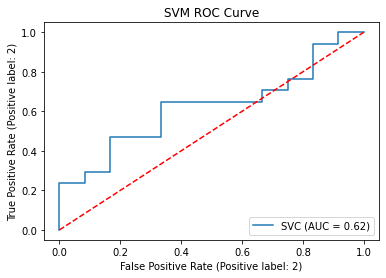

In [45]:
plot_roc_curve(svc, X_test, Y_test)
plt.title('SVM ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()